In [1]:
import sys, os
p = os.path.abspath('..')
# p = p+r'\config'
sys.path.insert(1, p)

In [2]:
import pandas as pd
import re
import numpy as np


In [3]:
path = './result'
file_list = os.listdir(path)

In [4]:
tmp = pd.DataFrame()
df_eval = pd.DataFrame()
acc_list = []
def sc_calc_acc_condition_with_temp_with_sc(llm_model, few_shot_n, test_n, q_src_yn, ver, p_ver, sc_num, temp, excel_ver):
    path = './result'
    # ./result/sc_l_result_4_15_Y_30_sys_prompt8_0.01_ver1_0.csv
    file_list = os.listdir(path)
    opt_file = [x for x in file_list if x.startswith(f'sc_{llm_model}_result_{few_shot_n}_{test_n}_{q_src_yn}_{ver}_{p_ver}_{sc_num}_{temp}_{excel_ver}')]
    opt_file = [x for x in opt_file if x.endswith(f'.csv')]
    df = pd.DataFrame()
    
    if len(opt_file)>0 : 
        for f in opt_file:
            print(f)
            tmp = pd.read_csv(f'{path}/{f}', index_col =0)
            tmp = tmp.dropna()

            tmp['gold'] = tmp['answer_encode'].apply(lambda x : re.sub(r'[^012]', '', x))
            tmp['o_result'] = tmp['result'].apply(lambda x : re.sub(r'[^012]', '', x))
            tmp = tmp[tmp['o_result'].isin(['1', '0', '2'])]

            
            gold_df = tmp[['id', 'gold']].drop_duplicates()
            chk_cnt = tmp.groupby(['id', 'o_result']).count().reset_index()[['id', 'o_result', 'question']]
            chk_cnt = chk_cnt.rename(columns = {'question': 'cnt'})
            chk_cnt = chk_cnt[chk_cnt['cnt'] == sc_num]
            chk_cnt = chk_cnt.sort_values(by = ['id', 'cnt'], ascending=[True, False]).groupby(['id']).head(1)
            df_eval = pd.merge(gold_df, chk_cnt, on = ['id'])

            df_eval['equal_yn'] = np.where(df_eval['gold']==df_eval['o_result'], 1, 0)
            acc = (df_eval['equal_yn'].sum()/df_eval.shape[0])*100  
            acc_list.append(acc)
            # print(df_eval)
            df = pd.concat([df, df_eval], axis =0)
            
        df['equal_yn'] = np.where(df['gold']==df['o_result'], 1, 0)
        acc = (df['equal_yn'].sum()/df.shape[0])*100            
        print(f'{llm_model}_result_{few_shot_n}_{test_n}_{q_src_yn} : ', acc)


In [5]:
# sc_calc_acc_condition_with_temp_with_sc('l', 4, 15, 'Y', 30, 'sys_prompt8', 5,  0.01, 'ver1')
# # process3 = Process(target=task, args=('l', 4, 15, 'Y', 30, 'sys_prompt8', 3, 0.01, 'ver1'))
sc_calc_acc_condition_with_temp_with_sc('l', 4, 30, 'Y', 100, 'sys_prompt8', 5,  0.01, 'ver2')
# 그래프 그려서 넣어두기... 분포....

sc_l_result_4_30_Y_100_sys_prompt8_5_0.01_ver2_16.csv
sc_l_result_4_30_Y_100_sys_prompt8_5_0.01_ver2_84.csv
sc_l_result_4_30_Y_100_sys_prompt8_5_0.01_ver2_0.csv
sc_l_result_4_30_Y_100_sys_prompt8_5_0.01_ver2_10.csv
sc_l_result_4_30_Y_100_sys_prompt8_5_0.01_ver2_64.csv
sc_l_result_4_30_Y_100_sys_prompt8_5_0.01_ver2_35.csv
sc_l_result_4_30_Y_100_sys_prompt8_5_0.01_ver2_72.csv
sc_l_result_4_30_Y_100_sys_prompt8_5_0.01_ver2_2.csv
sc_l_result_4_30_Y_100_sys_prompt8_5_0.01_ver2_12.csv
sc_l_result_4_30_Y_100_sys_prompt8_5_0.01_ver2_74.csv
sc_l_result_4_30_Y_100_sys_prompt8_5_0.01_ver2_62.csv
sc_l_result_4_30_Y_100_sys_prompt8_5_0.01_ver2_54.csv
sc_l_result_4_30_Y_100_sys_prompt8_5_0.01_ver2_32.csv
sc_l_result_4_30_Y_100_sys_prompt8_5_0.01_ver2_45.csv
sc_l_result_4_30_Y_100_sys_prompt8_5_0.01_ver2_18.csv
sc_l_result_4_30_Y_100_sys_prompt8_5_0.01_ver2_86.csv
sc_l_result_4_30_Y_100_sys_prompt8_5_0.01_ver2_15.csv
sc_l_result_4_30_Y_100_sys_prompt8_5_0.01_ver2_33.csv
sc_l_result_4_30_Y_100_sys_pro

In [6]:
np.mean(acc_list)

83.67379071062875

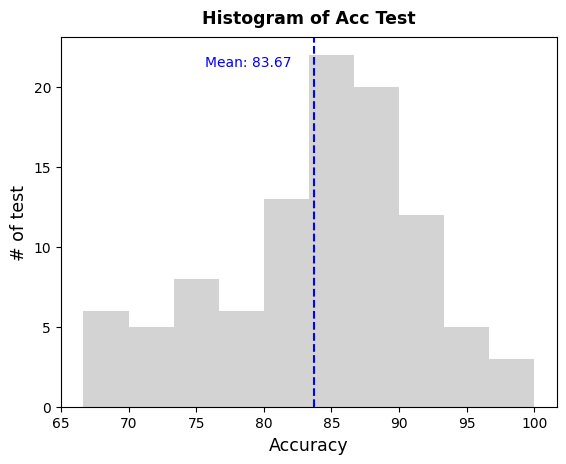

In [46]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

ax.hist(acc_list
    ,  color = 'lightgray'
    # ,  edgecolor = 'black'
      ) # hist type

ax.set_title("Histogram of Acc Test", # add title
             fontsize = 12.5,
             weight = 'bold',
             pad = 10,
             loc = 'center')
ax.set_xlabel("Accuracy", # add x-axis label
              fontsize = 12.5)
ax.set_ylabel("# of test", # add y-axis label
              fontsize = 12.5)

ax.axvline(np.mean(acc_list), # add vertical line
           color = 'blue',
           linestyle = '--',
           linewidth = 1.5)
fig.text(0.35, 0.82, color = 'blue', fontsize = 10,  s='Mean: ' + str(round(np.mean(acc_list), 2))) #


plt.show();


In [8]:
# def calc_acc_condition(llm_model, few_shot_n, test_n, q_src_yn, p_ver):
#     opt_file = [x for x in file_list if x.startswith(f'{llm_model}_result_{few_shot_n}_{test_n}_{q_src_yn}')]
#     opt_file = [x for x in opt_file if x.endswith(f'_{p_ver}.csv')]

#     if len(opt_file)>0 : 
#         df = pd.DataFrame()

#         for f in opt_file:
#             tmp = pd.read_csv(f'./result/{f}', index_col =0)
#             df = pd.concat([df, tmp], axis =0)
        
#         df['gold'] = df['answer_encode'].apply(lambda x : re.sub(r'[^0-9]', '', x))
#         df['o_result'] = df['result'].apply(lambda x : re.sub(r'[^0-9]', '', x))
#         df['equal_yn'] = np.where(df['gold']==df['o_result'], 1, 0)
#         acc = (df['equal_yn'].sum()/df.shape[0])*100
#         print(f'{llm_model}_result_{few_shot_n}_{test_n}_{q_src_yn} : ', acc)


In [9]:
def calc_acc_condition(llm_model, few_shot_n, test_n, q_src_yn, p_ver):
    opt_file = [x for x in file_list if x.startswith(f'{llm_model}_result_{few_shot_n}_{test_n}_{q_src_yn}')]
    opt_file = [x for x in opt_file if x.endswith(f'_{p_ver}.csv')]

    if len(opt_file)>0 : 
        df = pd.DataFrame()

        for f in opt_file:
            tmp = pd.read_csv(f'./result/{f}', index_col =0)
            tmp['gold'] = tmp['answer_encode'].apply(lambda x : re.sub(r'[^0-9]', '', x))
            tmp['o_result'] = tmp['result'].apply(lambda x : re.sub(r'[^0-9]', '', x))
            tmp[['gold', 'o_result']] = tmp[['gold', 'o_result']].astype(int)
            df_eval = tmp.groupby('id').mean('o_result').reset_index()
            df_eval['o_result'] = df_eval['o_result'].round(0)
            df = pd.concat([df, tmp], axis =0)
            
        df['equal_yn'] = np.where(df['gold']==df['o_result'], 1, 0)
        acc = (df['equal_yn'].sum()/df.shape[0])*100            
        print(f'{llm_model}_result_{few_shot_n}_{test_n}_{q_src_yn} : ', acc)


In [10]:
calc_acc_condition('c' , 2, 10, 'N', 'sys_prompt1')
calc_acc_condition('c' , 2, 10, 'Y', 'sys_prompt1')
calc_acc_condition('c' , 3, 10, 'N', 'sys_prompt1')
calc_acc_condition('c' , 3, 10, 'Y', 'sys_prompt1')


calc_acc_condition('l' , 1, 10, 'Y', 'sys_prompt1')
calc_acc_condition('l' , 2, 10, 'Y', 'sys_prompt1')
calc_acc_condition('l' , 3, 10, 'Y', 'sys_prompt1')
calc_acc_condition('l' , 4, 10, 'Y', 'sys_prompt1')

calc_acc_condition('l' , 1, 10, 'N', 'sys_prompt1')
calc_acc_condition('l' , 2, 10, 'N', 'sys_prompt1')
calc_acc_condition('l' , 3, 10, 'N', 'sys_prompt1')
calc_acc_condition('l' , 4, 10, 'N', 'sys_prompt1')


l_result_1_10_Y :  66.0
l_result_2_10_Y :  56.00000000000001
l_result_3_10_Y :  56.00000000000001
l_result_1_10_N :  59.0
l_result_2_10_N :  59.0
l_result_3_10_N :  51.0


In [11]:
calc_acc_condition('c' , 2, 10, 'N', 'sys_prompt2')
calc_acc_condition('c' , 2, 10, 'Y', 'sys_prompt2')
calc_acc_condition('c' , 3, 10, 'N', 'sys_prompt2')
calc_acc_condition('c' , 3, 10, 'Y', 'sys_prompt2')

calc_acc_condition('l' , 1, 10, 'Y', 'sys_prompt2')
calc_acc_condition('l' , 2, 10, 'Y', 'sys_prompt2')
calc_acc_condition('l' , 3, 10, 'Y', 'sys_prompt2')
calc_acc_condition('l' , 4, 10, 'Y', 'sys_prompt2')


calc_acc_condition('l' , 1, 10, 'N', 'sys_prompt2')
calc_acc_condition('l' , 2, 10, 'N', 'sys_prompt2')
calc_acc_condition('l' , 3, 10, 'N', 'sys_prompt2')
calc_acc_condition('l' , 4, 10, 'N', 'sys_prompt2')


l_result_1_10_Y :  60.0
l_result_2_10_Y :  68.0
l_result_3_10_Y :  69.0
l_result_1_10_N :  64.0
l_result_2_10_N :  63.0
l_result_3_10_N :  64.0


In [12]:
calc_acc_condition('c' , 2, 10, 'N', 'sys_prompt3')
calc_acc_condition('c' , 2, 10, 'Y', 'sys_prompt3')
calc_acc_condition('c' , 3, 10, 'N', 'sys_prompt3')
calc_acc_condition('c' , 3, 10, 'Y', 'sys_prompt3')

calc_acc_condition('l' , 1, 10, 'Y', 'sys_prompt3')
calc_acc_condition('l' , 2, 10, 'Y', 'sys_prompt3')
calc_acc_condition('l' , 3, 10, 'Y', 'sys_prompt3')
calc_acc_condition('l' , 4, 10, 'Y', 'sys_prompt3')


calc_acc_condition('l' , 1, 10, 'N', 'sys_prompt3')
calc_acc_condition('l' , 2, 10, 'N', 'sys_prompt3')
calc_acc_condition('l' , 3, 10, 'N', 'sys_prompt3')
calc_acc_condition('l' , 4, 10, 'N', 'sys_prompt3')


l_result_1_10_Y :  64.0
l_result_2_10_Y :  60.0
l_result_3_10_Y :  64.0
l_result_1_10_N :  60.0
l_result_2_10_N :  60.0
l_result_3_10_N :  63.0


In [13]:
calc_acc_condition('c' , 2, 10, 'N', 'sys_prompt4')
calc_acc_condition('c' , 2, 10, 'Y', 'sys_prompt4')
calc_acc_condition('c' , 3, 10, 'N', 'sys_prompt4')
calc_acc_condition('c' , 3, 10, 'Y', 'sys_prompt4')

calc_acc_condition('l' , 1, 10, 'Y', 'sys_prompt4')
calc_acc_condition('l' , 2, 10, 'Y', 'sys_prompt4')
calc_acc_condition('l' , 3, 10, 'Y', 'sys_prompt4')
calc_acc_condition('l' , 4, 10, 'Y', 'sys_prompt4')


calc_acc_condition('l' , 1, 10, 'N', 'sys_prompt4')
calc_acc_condition('l' , 2, 10, 'N', 'sys_prompt4')
calc_acc_condition('l' , 3, 10, 'N', 'sys_prompt4')
calc_acc_condition('l' , 4, 10, 'N', 'sys_prompt4')


l_result_1_10_Y :  61.0
l_result_2_10_Y :  65.0
l_result_3_10_Y :  67.0
l_result_1_10_N :  65.0
l_result_2_10_N :  70.0
l_result_3_10_N :  66.0


In [14]:
def sc_calc_acc_condition(llm_model, few_shot_n, test_n, q_src_yn, p_ver):
    opt_file = [x for x in file_list if x.startswith(f'sc_{llm_model}_result_{few_shot_n}_{test_n}_{q_src_yn}')]
    opt_file = [x for x in opt_file if x.endswith(f'_{p_ver}.csv')]
    df = pd.DataFrame()
    if len(opt_file)>0 : 
        print(opt_file)
        for f in opt_file:
            tmp = pd.read_csv(f'./result/{f}', index_col =0)
            tmp['gold'] = tmp['answer_encode'].apply(lambda x : re.sub(r'[^0-9]', '', x))
            tmp['o_result'] = tmp['result'].apply(lambda x : re.sub(r'[^0-9]', '', x))
            tmp[['gold', 'o_result']] = tmp[['gold', 'o_result']].astype(int)
            df_eval = tmp.groupby('id').mean('o_result').reset_index()
            df_eval['o_result'] = df_eval['o_result'].round(0)
            df_eval['equal_yn'] = np.where(df_eval['gold']==df_eval['o_result'], 1, 0)
            acc = (df_eval['equal_yn'].sum()/df_eval.shape[0])*100  
            # print(acc)
            df = pd.concat([df, df_eval], axis =0)
            
        df['equal_yn'] = np.where(df['gold']==df['o_result'], 1, 0)
        acc = (df['equal_yn'].sum()/df.shape[0])*100            
        print(f'{llm_model}_result_{few_shot_n}_{test_n}_{q_src_yn} : ', acc)


In [15]:
sc_calc_acc_condition('l' , 1, 10, 'Y', 'sys_prompt4')
sc_calc_acc_condition('l' , 2, 10, 'Y', 'sys_prompt4') # temperature 0.2
sc_calc_acc_condition('l' , 3, 10, 'Y', 'sys_prompt4')

sc_calc_acc_condition('l' , 1, 10, 'N', 'sys_prompt4')
sc_calc_acc_condition('l' , 2, 10, 'N', 'sys_prompt4')
sc_calc_acc_condition('l' , 3, 10, 'N', 'sys_prompt4')

['sc_l_result_1_10_Y_2_sys_prompt4.csv', 'sc_l_result_1_10_Y_3_sys_prompt4.csv', 'sc_l_result_1_10_Y_4_sys_prompt4.csv', 'sc_l_result_1_10_Y_0_sys_prompt4.csv', 'sc_l_result_1_10_Y_1_sys_prompt4.csv']
l_result_1_10_Y :  66.0
['sc_l_result_2_10_Y_16_sys_prompt4.csv', 'sc_l_result_2_10_Y_4_sys_prompt4.csv', 'sc_l_result_2_10_Y_6_sys_prompt4.csv', 'sc_l_result_2_10_Y_1_sys_prompt4.csv', 'sc_l_result_2_10_Y_2_sys_prompt4.csv', 'sc_l_result_2_10_Y_14_sys_prompt4.csv', 'sc_l_result_2_10_Y_17_sys_prompt4.csv', 'sc_l_result_2_10_Y_15_sys_prompt4.csv', 'sc_l_result_2_10_Y_3_sys_prompt4.csv', 'sc_l_result_2_10_Y_0_sys_prompt4.csv', 'sc_l_result_2_10_Y_7_sys_prompt4.csv', 'sc_l_result_2_10_Y_19_sys_prompt4.csv', 'sc_l_result_2_10_Y_5_sys_prompt4.csv', 'sc_l_result_2_10_Y_8_sys_prompt4.csv', 'sc_l_result_2_10_Y_13_sys_prompt4.csv', 'sc_l_result_2_10_Y_9_sys_prompt4.csv', 'sc_l_result_2_10_Y_11_sys_prompt4.csv', 'sc_l_result_2_10_Y_10_sys_prompt4.csv', 'sc_l_result_2_10_Y_18_sys_prompt4.csv', 'sc_l

In [16]:
sc_calc_acc_condition('l' , 1, 5, 'Y', 'sys_prompt4')
sc_calc_acc_condition('l' , 2, 5, 'Y', 'sys_prompt4')
sc_calc_acc_condition('l' , 3, 5, 'Y', 'sys_prompt4')

# sc_l_result_1_10_Y_0_sys_prompt4.csv
# (f'./result/sc_{llm_model}_result_{few_shot_n}_{self.test_n}_{q_src_yn}_{self.version}_{self.p_ver}.csv')

sc_calc_acc_condition('l' , 1, 5, 'N', 'sys_prompt4')
sc_calc_acc_condition('l' , 2, 5, 'N', 'sys_prompt4')
sc_calc_acc_condition('l' , 3, 5, 'N', 'sys_prompt4')


['sc_l_result_1_5_Y_5_sys_prompt4.csv', 'sc_l_result_1_5_Y_8_sys_prompt4.csv', 'sc_l_result_1_5_Y_9_sys_prompt4.csv', 'sc_l_result_1_5_Y_6_sys_prompt4.csv', 'sc_l_result_1_5_Y_4_sys_prompt4.csv', 'sc_l_result_1_5_Y_2_sys_prompt4.csv', 'sc_l_result_1_5_Y_7_sys_prompt4.csv', 'sc_l_result_1_5_Y_1_sys_prompt4.csv', 'sc_l_result_1_5_Y_0_sys_prompt4.csv', 'sc_l_result_1_5_Y_3_sys_prompt4.csv']
l_result_1_5_Y :  72.0
['sc_l_result_2_5_Y_5_sys_prompt4.csv', 'sc_l_result_2_5_Y_6_sys_prompt4.csv', 'sc_l_result_2_5_Y_3_sys_prompt4.csv', 'sc_l_result_2_5_Y_1_sys_prompt4.csv', 'sc_l_result_2_5_Y_4_sys_prompt4.csv', 'sc_l_result_2_5_Y_2_sys_prompt4.csv', 'sc_l_result_2_5_Y_0_sys_prompt4.csv']
l_result_2_5_Y :  82.85714285714286
['sc_l_result_3_5_Y_3_sys_prompt4.csv', 'sc_l_result_3_5_Y_6_sys_prompt4.csv', 'sc_l_result_3_5_Y_4_sys_prompt4.csv', 'sc_l_result_3_5_Y_5_sys_prompt4.csv', 'sc_l_result_3_5_Y_0_sys_prompt4.csv', 'sc_l_result_3_5_Y_2_sys_prompt4.csv', 'sc_l_result_3_5_Y_1_sys_prompt4.csv']
l_

In [17]:

sc_calc_acc_condition('l' , 2, 5, 'Y', 'sys_prompt5')
sc_calc_acc_condition('l' , 2, 5, 'N', 'sys_prompt5')


['sc_l_result_2_5_Y_2_sys_prompt5.csv', 'sc_l_result_2_5_Y_4_sys_prompt5.csv', 'sc_l_result_2_5_Y_3_sys_prompt5.csv', 'sc_l_result_2_5_Y_0_sys_prompt5.csv', 'sc_l_result_2_5_Y_1_sys_prompt5.csv']
l_result_2_5_Y :  52.0
['sc_l_result_2_5_N_0_sys_prompt5.csv', 'sc_l_result_2_5_N_4_sys_prompt5.csv', 'sc_l_result_2_5_N_3_sys_prompt5.csv', 'sc_l_result_2_5_N_2_sys_prompt5.csv', 'sc_l_result_2_5_N_1_sys_prompt5.csv']
l_result_2_5_N :  48.0


In [18]:

sc_calc_acc_condition('c' , 2, 10, 'Y', 'sys_prompt4')
sc_calc_acc_condition('c' , 2, 10, 'N', 'sys_prompt4')


['sc_c_result_2_10_Y_2_sys_prompt4.csv', 'sc_c_result_2_10_Y_7_sys_prompt4.csv', 'sc_c_result_2_10_Y_8_sys_prompt4.csv', 'sc_c_result_2_10_Y_4_sys_prompt4.csv', 'sc_c_result_2_10_Y_6_sys_prompt4.csv', 'sc_c_result_2_10_Y_9_sys_prompt4.csv', 'sc_c_result_2_10_Y_5_sys_prompt4.csv', 'sc_c_result_2_10_Y_3_sys_prompt4.csv', 'sc_c_result_2_10_Y_1_sys_prompt4.csv', 'sc_c_result_2_10_Y_0_sys_prompt4.csv']
c_result_2_10_Y :  56.00000000000001


In [19]:
sc_calc_acc_condition('c' , 2, 10, 'Y', 'sys_prompt7')
sc_calc_acc_condition('c' , 2, 10, 'N', 'sys_prompt7')


['sc_c_result_2_10_Y_4_sys_prompt7.csv', 'sc_c_result_2_10_Y_0_sys_prompt7.csv', 'sc_c_result_2_10_Y_3_sys_prompt7.csv', 'sc_c_result_2_10_Y_1_sys_prompt7.csv', 'sc_c_result_2_10_Y_5_sys_prompt7.csv', 'sc_c_result_2_10_Y_2_sys_prompt7.csv']
c_result_2_10_Y :  56.666666666666664


In [20]:

sc_calc_acc_condition('l' , 2, 10, 'Y', 'sys_prompt7')
sc_calc_acc_condition('l' , 2, 10, 'N', 'sys_prompt7')


['sc_l_result_2_10_Y_1_sys_prompt7.csv', 'sc_l_result_2_10_Y_6_sys_prompt7.csv', 'sc_l_result_2_10_Y_0_sys_prompt7.csv', 'sc_l_result_2_10_Y_7_sys_prompt7.csv', 'sc_l_result_2_10_Y_8_sys_prompt7.csv', 'sc_l_result_2_10_Y_5_sys_prompt7.csv', 'sc_l_result_2_10_Y_9_sys_prompt7.csv', 'sc_l_result_2_10_Y_2_sys_prompt7.csv', 'sc_l_result_2_10_Y_4_sys_prompt7.csv', 'sc_l_result_2_10_Y_3_sys_prompt7.csv']
l_result_2_10_Y :  60.0


In [21]:

sc_calc_acc_condition('l' , 4, 10, 'Y', 'sys_prompt7')
sc_calc_acc_condition('l' , 4, 10, 'N', 'sys_prompt7')


['sc_l_result_4_10_Y_1_sys_prompt7.csv', 'sc_l_result_4_10_Y_8_sys_prompt7.csv', 'sc_l_result_4_10_Y_9_sys_prompt7.csv', 'sc_l_result_4_10_Y_0_sys_prompt7.csv', 'sc_l_result_4_10_Y_6_sys_prompt7.csv', 'sc_l_result_4_10_Y_7_sys_prompt7.csv', 'sc_l_result_4_10_Y_3_sys_prompt7.csv', 'sc_l_result_4_10_Y_2_sys_prompt7.csv', 'sc_l_result_4_10_Y_5_sys_prompt7.csv', 'sc_l_result_4_10_Y_4_sys_prompt7.csv']
l_result_4_10_Y :  69.0


In [22]:
def sc_calc_acc_condition_with_temp(llm_model, few_shot_n, test_n, q_src_yn, p_ver, temp):
    opt_file = [x for x in file_list if x.startswith(f'sc_{llm_model}_result_{few_shot_n}_{test_n}_{q_src_yn}')]
    opt_file = [x for x in opt_file if x.endswith(f'_{p_ver}_{temp}.csv')]
    df = pd.DataFrame()
    if len(opt_file)>0 : 
        for f in opt_file:
            print(f)
            tmp = pd.read_csv(f'./result/{f}', index_col =0)
            tmp['gold'] = tmp['answer_encode'].apply(lambda x : re.sub(r'[^0-9]', '', x))
            tmp['o_result'] = tmp['result'].apply(lambda x : re.sub(r'[^0-9]', '', x))
            tmp[['gold', 'o_result']] = tmp[['gold', 'o_result']].astype(int)
            df_eval = tmp.groupby('id').mean('o_result').reset_index()
            df_eval['o_result'] = df_eval['o_result'].round(0)
            df_eval['equal_yn'] = np.where(df_eval['gold']==df_eval['o_result'], 1, 0)
            acc = (df_eval['equal_yn'].sum()/df_eval.shape[0])*100  
            print(acc)
            df = pd.concat([df, df_eval], axis =0)
            
        df['equal_yn'] = np.where(df['gold']==df['o_result'], 1, 0)
        acc = (df['equal_yn'].sum()/df.shape[0])*100            
        print(f'{llm_model}_result_{few_shot_n}_{test_n}_{q_src_yn} : ', acc)


In [23]:
sc_calc_acc_condition_with_temp('l', 2, 10, 'Y','sys_prompt4', 0)

sc_l_result_2_10_Y_14_sys_prompt4_0.csv
70.0
sc_l_result_2_10_Y_6_sys_prompt4_0.csv
60.0
sc_l_result_2_10_Y_2_sys_prompt4_0.csv
60.0
sc_l_result_2_10_Y_17_sys_prompt4_0.csv
50.0
sc_l_result_2_10_Y_12_sys_prompt4_0.csv
70.0
sc_l_result_2_10_Y_5_sys_prompt4_0.csv
60.0
sc_l_result_2_10_Y_4_sys_prompt4_0.csv
70.0
sc_l_result_2_10_Y_0_sys_prompt4_0.csv
90.0
sc_l_result_2_10_Y_8_sys_prompt4_0.csv
70.0
sc_l_result_2_10_Y_10_sys_prompt4_0.csv
60.0
sc_l_result_2_10_Y_15_sys_prompt4_0.csv
60.0
sc_l_result_2_10_Y_9_sys_prompt4_0.csv
70.0
sc_l_result_2_10_Y_13_sys_prompt4_0.csv
60.0
sc_l_result_2_10_Y_3_sys_prompt4_0.csv
50.0
sc_l_result_2_10_Y_11_sys_prompt4_0.csv
60.0
sc_l_result_2_10_Y_19_sys_prompt4_0.csv
70.0
sc_l_result_2_10_Y_16_sys_prompt4_0.csv
70.0
sc_l_result_2_10_Y_7_sys_prompt4_0.csv
80.0
sc_l_result_2_10_Y_18_sys_prompt4_0.csv
50.0
sc_l_result_2_10_Y_1_sys_prompt4_0.csv
60.0
l_result_2_10_Y :  64.5


In [24]:
llm_model, few_shot_n,test_n, q_src_yn, p_ver, temp = 'l',2, 10, 'Y','sys_prompt4', 0
opt_file = [x for x in file_list if x.startswith(f'sc_{llm_model}_result_{few_shot_n}_{test_n}_{q_src_yn}')]
opt_file = [x for x in opt_file if x.endswith(f'_{p_ver}_{temp}.csv')]
df = pd.DataFrame()
if len(opt_file)>0 : 
    for f in opt_file:
        print(f)
        tmp = pd.read_csv(f'./result/{f}', index_col =0)
        tmp['gold'] = tmp['answer_encode'].apply(lambda x : re.sub(r'[^0-9]', '', x))
        tmp['o_result'] = tmp['result'].apply(lambda x : re.sub(r'[^0-9]', '', x))
        tmp[['gold', 'o_result']] = tmp[['gold', 'o_result']].astype(int)
        tmp['equal_yn'] = np.where(tmp['gold']==tmp['o_result'], 1, 0)
        acc = (tmp['equal_yn'].sum()/tmp.shape[0])*100  
        df = pd.concat([df, tmp], axis =0)

df.to_csv('youcandoit.csv')

sc_l_result_2_10_Y_14_sys_prompt4_0.csv
sc_l_result_2_10_Y_6_sys_prompt4_0.csv
sc_l_result_2_10_Y_2_sys_prompt4_0.csv
sc_l_result_2_10_Y_17_sys_prompt4_0.csv
sc_l_result_2_10_Y_12_sys_prompt4_0.csv
sc_l_result_2_10_Y_5_sys_prompt4_0.csv
sc_l_result_2_10_Y_4_sys_prompt4_0.csv
sc_l_result_2_10_Y_0_sys_prompt4_0.csv
sc_l_result_2_10_Y_8_sys_prompt4_0.csv
sc_l_result_2_10_Y_10_sys_prompt4_0.csv
sc_l_result_2_10_Y_15_sys_prompt4_0.csv
sc_l_result_2_10_Y_9_sys_prompt4_0.csv
sc_l_result_2_10_Y_13_sys_prompt4_0.csv
sc_l_result_2_10_Y_3_sys_prompt4_0.csv
sc_l_result_2_10_Y_11_sys_prompt4_0.csv
sc_l_result_2_10_Y_19_sys_prompt4_0.csv
sc_l_result_2_10_Y_16_sys_prompt4_0.csv
sc_l_result_2_10_Y_7_sys_prompt4_0.csv
sc_l_result_2_10_Y_18_sys_prompt4_0.csv
sc_l_result_2_10_Y_1_sys_prompt4_0.csv


In [25]:
sc_calc_acc_condition_with_temp('l', 2, 10, 'Y','sys_prompt4', 0.5)

sc_l_result_2_10_Y_3_sys_prompt4_0.5.csv
40.0
sc_l_result_2_10_Y_4_sys_prompt4_0.5.csv
60.0
sc_l_result_2_10_Y_2_sys_prompt4_0.5.csv
70.0
sc_l_result_2_10_Y_1_sys_prompt4_0.5.csv
70.0
sc_l_result_2_10_Y_0_sys_prompt4_0.5.csv
50.0
l_result_2_10_Y :  57.99999999999999
